In [1]:
import cv2
import os 
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [37]:
path = 'Faces'
detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)] 
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        if imagePath == 'Faces' + '/.DS_Store':
            continue
        #PIL_img = Image.open(imagePath).convert('L') #Luminance  ==> greystyle
        gray = cv2.imread(imagePath)
        
        #img_numpy = np.array(imagePath,'uint8')
        #print(PIL_img)
        #.show()
        #print(len(img_numpy)
        i = 0
        while(i < 10):
            i+=1
            id = int(os.path.split(imagePath)[-1].split(".")[0])
            faces = detector.detectMultiScale(gray, scaleFactor=1.5, minNeighbors = 5)
            faces = sorted(faces, key = lambda x: x[2]*x[3], reverse = True)
            faces = faces[:1] 
            crop_img = 0
            if len(faces) == 1: 
                face = faces[0] 
                x, y, w, h = face
                PIL_img = Image.open(imagePath).convert('L') #Luminance  ==> greystyle
                PIL_img = PIL_img.crop((x, y, x+w, y+h))
                PIL_img = PIL_img.resize((100,100))
                img_numpy = np.array(PIL_img,'uint8')
                faceSamples.append(img_numpy)
                #faceSamples.append(img_numpy[y:y+h,x:x+w])
                
                
                #crop_img = gray[y:y + h, x:x + w]
                #crop_img = cv2.resize(crop_img, (100, 100))
                #faceSamples.append(crop_img.reshape(-1))
                ids.append(id)
    return faceSamples,ids
"""
        plt.clf()
        plt.figure(figsize=(12,8))
        testimage3 = cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB)
        plt.imshow(testimage3)
        plt.show()
"""
        #print(id)
        #print(faces)
    
    
faces,ids = getImagesAndLabels(path)


#print("{0} faces, {0} id in total are detected".format(len(faces), len(ids)))

In [38]:
face_recognizer=cv2.face.LBPHFaceRecognizer_create()

face_recognizer.train(faces, np.array(ids))

def train_classifier(faces, faceID):
    face_recognizer=cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces, np.array(faceID))
    return face_recognizer
# Save the model as bdktrainer.yml
facerecognizer = train_classifier(faces, ids)
facerecognizer.save('bdktrainer.yml')

number of faces = 2 
[[ 951 1091 1242 1242]
 [1279  831   54   54]]
951 1091 1242 1242


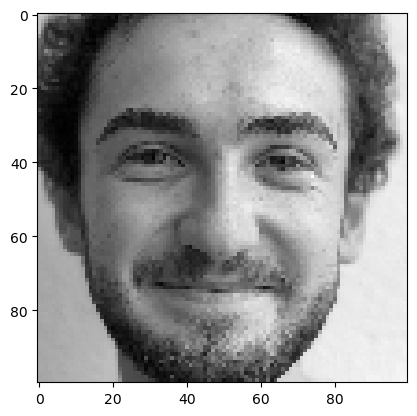

confidence: 111.28688554427492
label: 2
Beckham
1279 831 54 54


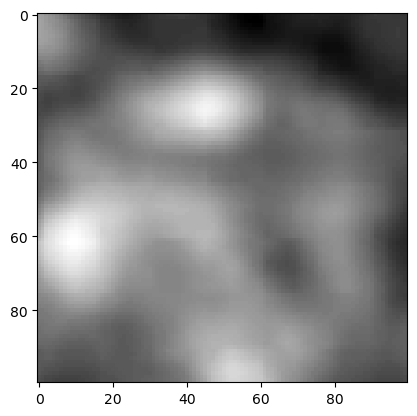

confidence: 163.24513041893263
label: 2
Beckham


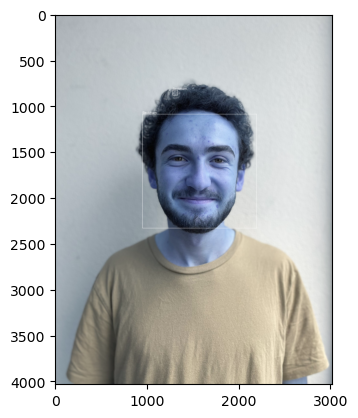

In [41]:
name = {1:"Nick", 2:"Beckham", 3:"Trump"}
imgloc = 'test.jpg'
gray = cv2.imread(imgloc)
gray2 = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
#plt.imshow(gray2)
#plt.show()

grayimage2 = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(grayimage2,scaleFactor=1.1, minNeighbors = 5)

print('number of faces = {0} '.format(len(faces)))
#plt.imshow(gray)
#plt.show()


def put_text(test_img,text,x,y): 
    cv2.putText(test_img,text,(x,y),cv2.FONT_ITALIC,1.1,(255,255,255),2) #text, font size, font color( purple yellow), thickness

print(faces)

for face in faces:
    
    (x,y,w,h) = face
    print(x,y,w,h)
    roi_gray = grayimage2[y:y+h, x:x+h]
    roi_gray = cv2.resize(roi_gray, (100, 100))
    
    plt.imshow(roi_gray, cmap='gray')
    plt.show()
    label, confidence = facerecognizer.predict(roi_gray)
    
    print("confidence:", confidence)
    print("label:", label)
    
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 2)
    predicted_name = name[label]
    print(predicted_name)
    put_text(gray, predicted_name,x,y-5) #put text 5 pixel higher than face
    
    gray = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
    
plt.imshow(gray)